In [40]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/dataframe_final.csv', index_col=0)
data_std = pd.read_csv('data/dataframe_std.csv', index_col=0)
label = pd.read_csv('data/label_final.csv', index_col=0)
data

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1963-01-01,0,173,861,3246,1,231,98,1819,905,719,4569
1963-01-01,0,254,245,2251,1,85,1271,0,786,504,858
1963-01-01,0,591,845,3404,1,144,934,380,414,904,6858
1963-01-01,0,372,501,3930,1,51,1582,2922,1156,595,4349
1963-01-01,0,610,791,3439,1,440,1173,2930,347,776,3377
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,834,346,668,1043,1,70,767,0,642,682,3100
2022-12-26,834,405,655,2675,0,46,249,1852,821,758,1270
2022-12-26,834,432,594,1716,1,662,1373,75,655,558,1652
2022-12-26,834,377,393,3764,1,595,2132,80,621,549,897


In [41]:

# split index's string(YYYY-mm-dd) into year, month, day
data['year'] = data.index.str.split('-').str[0].astype(int)
data['month'] = data.index.str.split('-').str[1].astype(int)

data_std['year'] = data_std.index.str.split('-').str[0].astype(int)
data_std['month'] = data_std.index.str.split('-').str[1].astype(int)

label['year'] = label.index.str.split('-').str[0].astype(int)
label['month'] = label.index.str.split('-').str[1].astype(int)

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler


features = ['date','danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
std = StandardScaler()
std.fit(data[features])
def getCorrelationAt(data, label, year, month):
    # show effect of each column on label
    # for especially y year m month
    # x-axis: column value
    # y-axis: label value
    # hue: year, month
    # regression plot
    # scatter plot
    # show correlation
    # for each 10 columns, 10 plots
    data_year = data[data['year'] == year]
    data_month = data_year[data_year['month'] == month]
    label_year = label[label['year'] == year]
    label_month = label_year[label_year['month'] == month]
    
    dataForShow = data_month[features]
    dataForShow = pd.DataFrame(dataForShow, columns=features, index=dataForShow.index)
    dataForShow['label'] = label_month['0']
    corrList = []
    for i, feature in enumerate(features):
        sns.regplot(x=feature, y='label', data=dataForShow)

        slope, intercept, corr, p_value, std_err = scipy.stats.linregress(dataForShow[feature], dataForShow['label'])
        corrList.append((corr, slope, intercept))
    return corrList

    

In [170]:
data_rec5 = data_std[data_std['year'] >= 2018]
label_rec5 = label[label['year'] >= 2018]

2018-1
2018-2
2018-3
2018-4
2018-5
2018-6
2018-7
2018-8
2018-9
2018-10
2018-11
2018-12
2019-1
2019-2
2019-3
2019-4
2019-5
2019-6
2019-7
2019-8
2019-9
2019-10
2019-11
2019-12
2020-1
2020-2
2020-3
2020-4
2020-5
2020-6
2020-7
2020-8
2020-9
2020-10
2020-11
2020-12
2021-1
2021-2
2021-3
2021-4
2021-5
2021-6
2021-7
2021-8
2021-9
2021-10
2021-11
2021-12
2022-1
2022-2
2022-3
2022-4
2022-5
2022-6
2022-7
2022-8
2022-9
2022-10
2022-11
2022-12


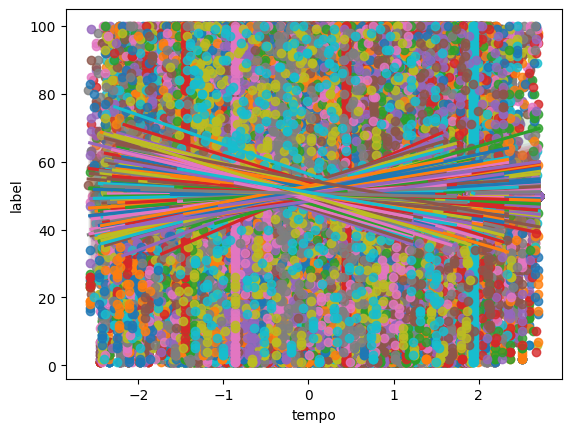

In [171]:
features = ['date','danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
ls = []
for i, y in enumerate(range(2018, 2023)):
    for j, m in enumerate(range(1, 13)):
        print(f'{y}-{m}')
        corrList = getCorrelationAt(data_rec5, label_rec5, y, m)
        ls.append(corrList)

In [172]:
dfs = np.zeros((60, 11, 3))
for i, k in enumerate(ls):
    for j, tp in enumerate(k):
        dfs[i][j] = tp

dfs

array([[[-4.60545700e-03, -2.11589324e+01,  6.70780230e+01],
        [-2.17631161e-01, -6.82504295e+00,  5.20761037e+01],
        [ 9.56538587e-03,  3.71288640e-01,  5.00009551e+01],
        ...,
        [ 4.80311775e-03,  1.95342876e-01,  5.00130407e+01],
        [-6.98212110e-02, -2.01156639e+00,  4.98200135e+01],
        [ 1.13454264e-01,  3.37122659e+00,  4.94216011e+01]],

       [[ 2.60221682e-03,  1.50160165e+01,  3.72690482e+01],
        [-1.54622383e-01, -5.46016006e+00,  5.20483594e+01],
        [ 4.82977340e-02,  2.00435215e+00,  4.99250467e+01],
        ...,
        [ 4.62791368e-02,  1.81193184e+00,  5.01995305e+01],
        [ 4.90503274e-02,  1.48386885e+00,  4.99110628e+01],
        [ 1.70466428e-01,  5.03579879e+00,  4.88800959e+01]],

       [[ 8.94158406e-03,  5.18735117e+01,  6.03562095e+00],
        [-1.15483708e-01, -3.92848993e+00,  5.14141004e+01],
        [ 7.12446130e-03,  2.86413081e-01,  4.99944376e+01],
        ...,
        [ 3.21696237e-02,  1.31551040e+00,

In [173]:
dfs.shape

(60, 11, 3)

In [174]:
labels = np.zeros((60, 11))
data_rec5_std = std.transform(data_rec5[features])
data_rec5_std = pd.DataFrame(data_rec5_std, columns=features, index=data_rec5.index)
for i in range(60):
    for j in range(11):
        labels[i][j] = data_rec5_std.iloc[i,j]

In [175]:
dfs = dfs.reshape(660, 3)
labels = labels.reshape(660)

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfs, labels, test_size=0.2, random_state=42)

In [179]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

models = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
model_names = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model_names[i]}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'R2: {r2_score(y_test, y_pred)}')
    
    

LinearRegression
MSE: 0.6393990226882267
R2: 0.009096614124586733
Ridge
MSE: 0.6428255298756094
R2: 0.0037864127429380057
Lasso
MSE: 0.6497858041421265
R2: -0.007000215156986567
ElasticNet
MSE: 0.6497858041421265
R2: -0.007000215156986567


In [180]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 1.2644427938600704
R2: -0.9595598385714914


In [181]:
from sklearn.model_selection import GridSearchCV

def getBestDTR(X_train, y_train, title, parameters):
    dtr = DecisionTreeRegressor()
    model = GridSearchCV(dtr, param_grid=parameters, n_jobs=-1, scoring='r2', cv=5)
    model.fit(X_train, y_train)
    
    print(f'{title} 최적 파라미터: {model.best_params_}')
    print(f'{title} 최고 점수: {model.best_score_}')

In [182]:
# parameters for DecisionTreeRegressor
parameters = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

getBestDTR(X_train, y_train, 'DecisionTreeRegressor', parameters)

DecisionTreeRegressor 최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTreeRegressor 최고 점수: -0.08129967774056242


In [183]:
parameters = {
    'max_depth': [5, 6, 7, 8, 9, 10],
    'min_samples_split': [5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1]
}

getBestDTR(X_train, y_train, 'DecisionTreeRegressor', parameters)

DecisionTreeRegressor 최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
DecisionTreeRegressor 최고 점수: -0.07788936895552076


In [184]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=1)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 0.6617529023960245
R2: -0.025546127424783904


In [186]:
data2023 = pd.read_csv('data/dataframes/dataframe_2023to2023.csv', index_col=0)
label2023 = pd.read_csv('data/dataframes/label_2023to2023.csv', index_col=0)

In [187]:
data2023['date'] = data2023['date'] + 835

In [188]:
data2023_std = std.transform(data2023[features])
data2023_std = pd.DataFrame(data2023_std, columns=features, index=data2023.index)

In [189]:
data2023_std['year'] = data2023_std.index.str.split('-').str[0].astype(int)
data2023_std['month'] = data2023_std.index.str.split('-').str[1].astype(int)

label2023['year'] = label2023.index.str.split('-').str[0].astype(int)
label2023['month'] = label2023.index.str.split('-').str[1].astype(int)

2023-1
2023-2
2023-3
2023-4
2023-5
2023-6
2023-7
2023-8
2023-9
2023-10
2023-11
2023-12


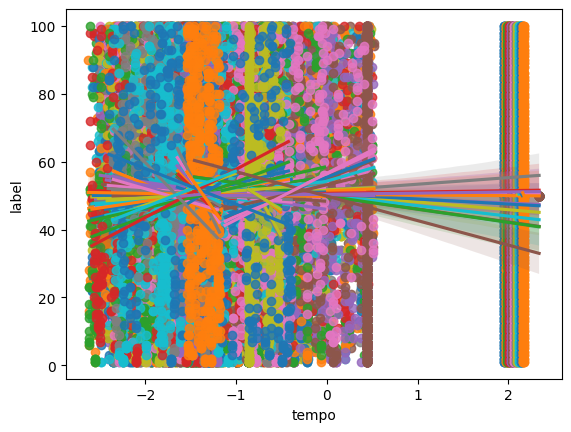

In [190]:
ls = []
for j, m in enumerate(range(1, 13)):
    print(f'{2023}-{m}')
    corrList = getCorrelationAt(data2023_std, label2023, 2023, m)
    ls.append(corrList)

In [191]:
dfs2023 = np.zeros((12, 11, 3))
for i, k in enumerate(ls):
    for j, tp in enumerate(k):
        dfs2023[i][j] = tp

dfs2023

array([[[ 6.32178356e-03,  2.88944561e+01, -6.50814973e+00],
        [ 7.27804156e-02,  2.92385094e+00,  5.39160553e+01],
        [ 4.22766061e-02,  2.06287536e+00,  5.31843424e+01],
        [-4.47410116e-02, -9.20503979e+00,  3.70265606e+01],
        [-3.60465286e-02, -1.09371919e+00,  4.99563927e+01],
        [ 1.72198207e-01,  1.05404822e+01,  5.49604814e+01],
        [-1.16721911e-01, -1.06264653e+01,  3.21492994e+01],
        [-2.04897582e-01, -4.86290674e+01,  1.28646738e+01],
        [ 1.14655738e-02,  9.65098498e-01,  5.16394833e+01],
        [-5.62331405e-02, -2.85249041e+00,  4.61330292e+01],
        [-6.47589890e-02, -1.67846128e+01,  2.71953503e+01]],

       [[-2.71820398e-04, -1.59260781e+00,  5.37850555e+01],
        [ 9.12399787e-02,  3.73780243e+00,  5.54661213e+01],
        [ 8.67847955e-02,  4.28488747e+00,  5.68515930e+01],
        [-1.54983454e-01, -3.42676266e+01,  2.25939013e+00],
        [-1.29312662e-01, -3.83170789e+00,  4.99098797e+01],
        [ 2.06853760e-

In [192]:
data2023

,date,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2023-01-01,835,12,206,574,1,106,333,0,31,173,414
2023-01-01,835,173,97,666,1,172,524,0,358,463,547
2023-01-01,835,300,74,652,1,91,527,0,21,430,113
2023-01-01,835,283,100,47,1,34,350,199,327,476,42
2023-01-01,835,240,50,49,1,43,514,0,41,466,322
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,887,187,381,100,1,247,223,0,317,404,416
2023-12-31,887,262,361,196,0,319,189,0,318,434,30
2023-12-31,887,92,331,273,1,38,311,22,158,240,393
2023-12-31,887,344,427,253,0,125,347,142,176,475,167


In [193]:
labels2023 = np.zeros((12, 11))
for i in range(12):
    for j in range(11):
        labels2023[i][j] = data2023_std[features].iloc[i,j]

In [194]:
dfs2023 = dfs2023.reshape(132, 3)
labels2023 = labels2023.reshape(132)

R2: -0.8776228002458049


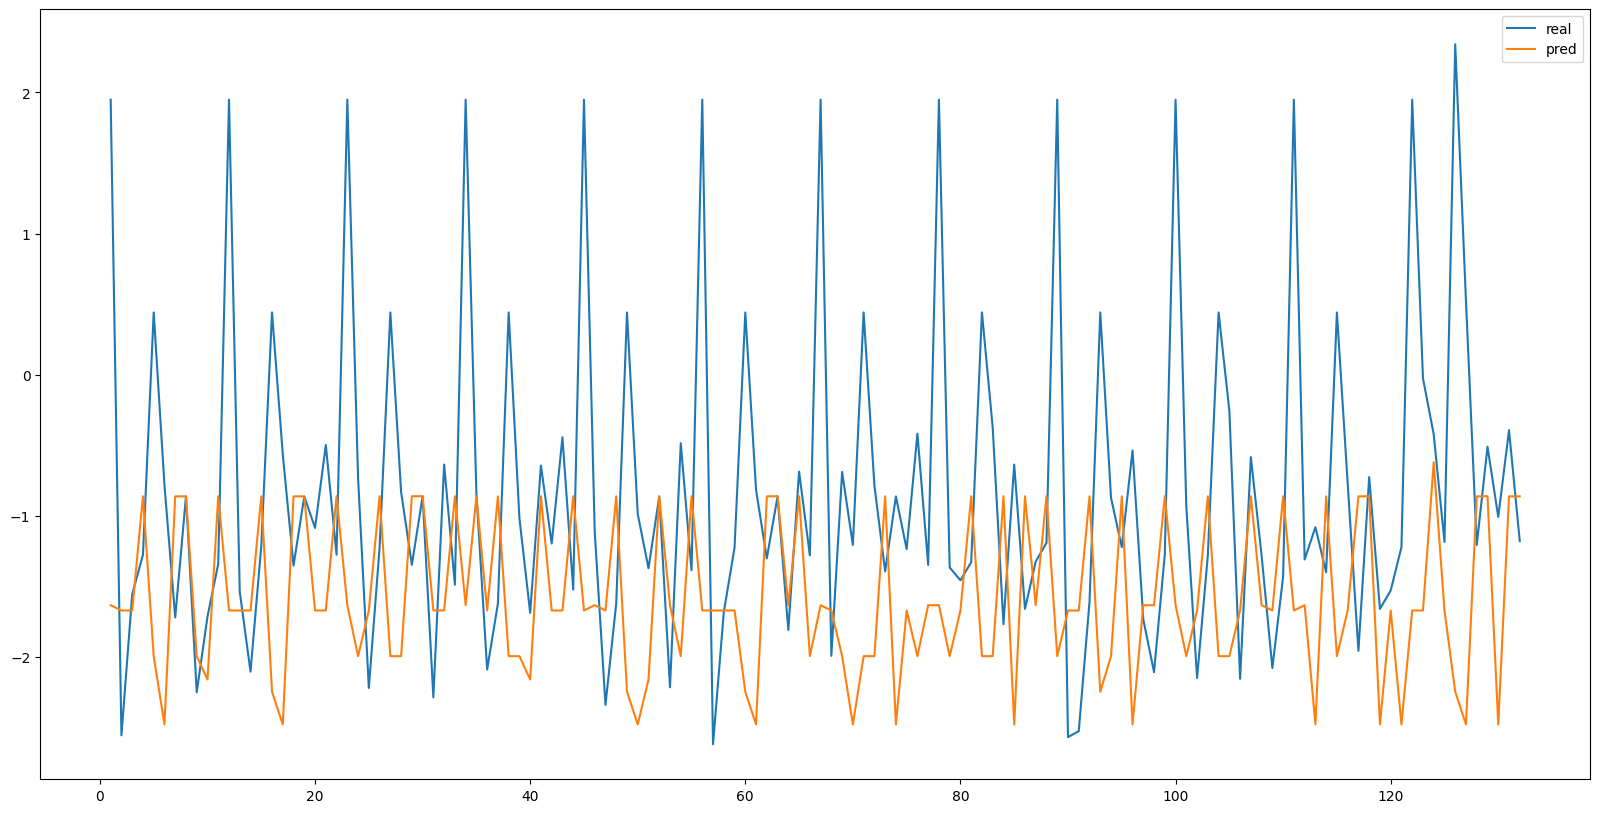

In [195]:
pred2023 = dt.predict(dfs2023)
score = r2_score(labels2023, pred2023)

plt.figure(figsize=(20, 10))
print(f'R2: {score}')
plt.plot(range(1, 133), labels2023, label='real')
plt.plot(range(1, 133), pred2023, label='pred')
plt.legend()
plt.show()

In [196]:
def getBestLR(X_train, y_train, title, parameters):
    lr = LinearRegression()
    model = GridSearchCV(lr, param_grid=parameters, n_jobs=-1, scoring='r2', cv=5)
    model.fit(X_train, y_train)
    
    print(f'{title} 최적 파라미터: {model.best_params_}')
    print(f'{title} 최고 점수: {model.best_score_}')

In [197]:
# parameters for LinearRegression
parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, 2, 3, 4, 5]
}

getBestLR(X_train, y_train, 'LinearRegression', parameters)

LinearRegression 최적 파라미터: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None}
LinearRegression 최고 점수: -0.0015407406841934535


R2: -0.8776228002458049


ValueError: x and y must have same first dimension, but have shapes (120,) and (132,)

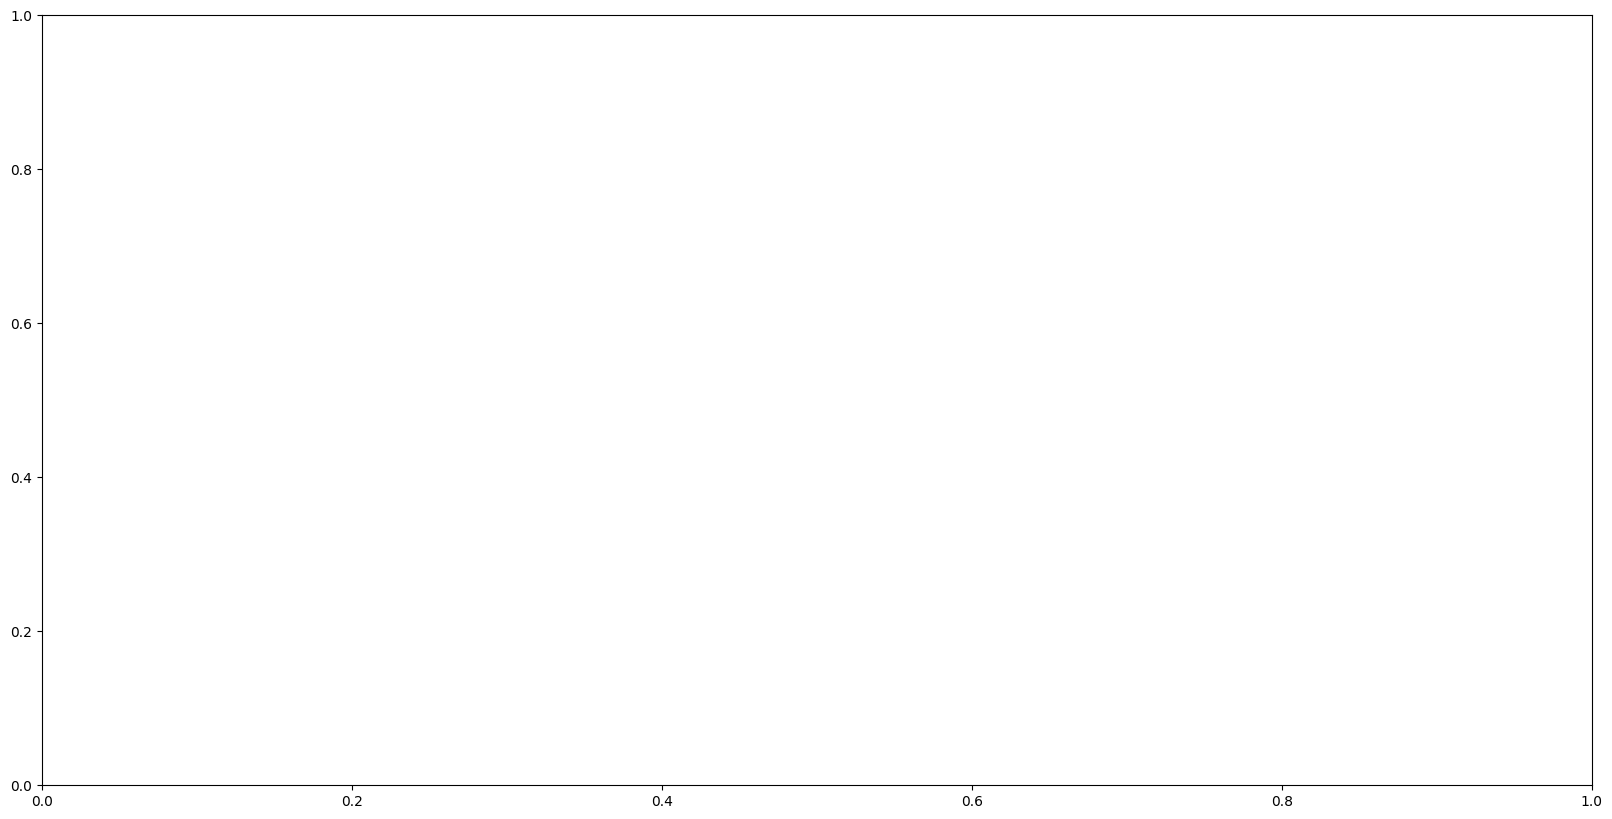

In [198]:
pred2023 = dt.predict(dfs2023)
score = r2_score(labels2023, pred2023)

plt.figure(figsize=(20, 10))
print(f'R2: {score}')
plt.plot(range(1, 121), labels2023, label='real')
plt.plot(range(1, 121), pred2023, label='pred')
plt.legend()
plt.show()

In [199]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(X_train, y_train)

y_predicted = KNN.predict(X_test)

train_score = KNN.score(X_train, y_train)
test_score = KNN.score(X_test, y_test)

print('학습 정확도 : ', round(train_score, 3))
print('검증 정확도 : ', round(test_score, 3))
print("LDA 평균 정확도", np.mean(cross_val_score(KNN, X_train, y_train, cv=5)))

학습 정확도 :  0.495
검증 정확도 :  -0.279
LDA 평균 정확도 -0.3707206478058165


In [12]:
data_std.drop(['year', 'month'], axis=1, inplace=True)
label.drop(['year', 'month'], axis=1, inplace=True)

In [13]:
import numpy as np
from datetime import datetime

def create_sequences(s_year, dataframe, label):
    Xs, ys = [], []
    curday = datetime(s_year, 1, 1)
    dayformat = curday.strftime('%Y-%m-%d')
    for idx in dataframe.index:
        if idx != dayformat:
            X = dataframe.loc[dayformat].values
            y = label.loc[dayformat].values
            
            s = np.arange(X.shape[0])
            np.random.shuffle(s)
            X = X[s]
            y = y[s]
            
            Xs.append(X)
            ys.append(y)
            dayformat = idx
        
    return np.array(Xs, dtype=object), np.array(ys, dtype=object)

In [14]:
Xs, ys = create_sequences(1963, data_std, label)

In [15]:
Xs.shape, ys.shape

((3131,), (3131,))

In [16]:
Xs[:10]

array([array([[-1.72229753,  0.41779939, -1.10419835, ..., -1.26955221,
                0.01417883, -1.30122733],
              [-1.72229753, -0.1889748 ,  1.28234651, ...,  0.42106131,
                1.3172405 ,  1.88339601],
              [-1.72229753, -2.32532558, -1.23455584, ...,  0.23598362,
               -1.67854437,  1.01837618],
              ...,
              [-1.72229753,  1.72615622, -0.01120091, ..., -1.36565024,
                1.34237995,  0.11519371],
              [-1.72229753, -0.51764415,  0.75590279, ..., -1.12718475,
                0.7055138 ,  0.91416282],
              [-1.72229753,  0.43044051,  0.27959657, ...,  1.73796027,
                0.6133358 , -0.16124079]])                             ,
       array([[-1.71790222, -0.5618881 , -1.81113705, ...,  1.66677654,
               -0.83218277,  2.08986567],
              [-1.71790222, -0.45443851,  0.31970657, ...,  0.37479189,
                0.47925872,  0.33144867],
              [-1.71790222,  1.3469223

In [17]:
def sequenceFlatter(X):
    temp = []
    for x in X:
        for i in x:
            temp.append(i)
    temp = np.array(temp)
    return temp

In [18]:
X = sequenceFlatter(Xs)
y = sequenceFlatter(ys)

In [19]:
# fit model and get coefficient

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [200]:

def modelingAndVisualizing(X_train, X_test, y_train, y_test):
    rfr = RandomForestRegressor().fit(X_train, y_train)
    print('Train score: {:.2f}'.format(rfr.score(X_train, y_train)))
    print('Test score: {:.2f}'.format(rfr.score(X_test, y_test)))
    

    return rfr


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [201]:
rfr = modelingAndVisualizing(X_train, X_test, y_train, y_test)

Train score: 0.85
Test score: -0.04


In [202]:
rfr.feature_importances_

array([0.27588971, 0.30452163, 0.41958866])